In [64]:
import pipeline as pl
import pandas as pd

# Step 1: Load Data
In this step, I loaded dataset and set the 'projectid' as index.

In [4]:
df = pl.read_data('projects_2012_2013.csv')

# Step 2: Explore Data
The exploration of data is divided into five parts:
- scatter plot of continuous variables
- summary of continuous variables
- summary of categorical variables
- histographs of variables
- graph of correlation between variables

In [5]:
continuous_vars = ['total_price_including_optional_support', 'students_reached']
categorical_vars = ['teacher_prefix', 'school_metro', 'school_charter', 'school_magnet',\
                    'primary_focus_subject', 'primary_focus_area',\
                    'secondary_focus_subject', 'secondary_focus_area',\
                    'resource_type', 'poverty_level', 'grade_level',\
                    'eligible_double_your_impact_match']

In [6]:
# create target variable: label 1 for projects that didn't get fully funded within 60 days, otherwise 0
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
df['days'] = (df['datefullyfunded'] - df['date_posted']).dt.days
df['NotFunded60days'] = [1 if x > 60 else 0 for x in df['days']]

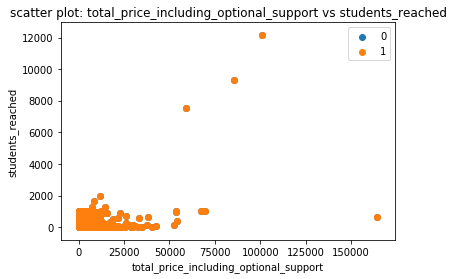

In [10]:
# generate scatter plot
pl.generate_scatter_graph(df, continuous_vars, 'NotFunded60days')

In [11]:
# do descriptive statistics of continuous variables
pl.summary_continuous_vars(df, continuous_vars)

,total_price_including_optional_support,students_reached
count,124976.000000,124917.000000
mean,654.011811,95.445760
std,1098.015854,163.481912
min,92.000000,1.000000
25%,345.810000,23.000000
50%,510.500000,30.000000
75%,752.960000,100.000000
max,164382.840000,12143.000000


In [12]:
# do descriptive statistics of categorical variables
for cat in categorical_vars:
    print(pl.summary_categorical_vars(df, cat))

  count  teacher_prefix
0  Mrs.           60190
1   Ms.           48511
2   Mr.           16273
3   Dr.               2
      count  school_metro
0     urban         62267
1  suburban         33084
2     rural         14401
  count  school_charter
0     f          113340
1     t           11636
  count  school_magnet
0     f         114273
1     t          10703
                    count  primary_focus_subject
0                Literacy                  37408
1             Mathematics                  16859
2    Literature & Writing                  16141
3           Special Needs                   8348
4             Visual Arts                   5870
5        Applied Sciences                   5825
6   Environmental Science                   4835
7   Health & Life Science                   4185
8                   Music                   3931
9     History & Geography                   2701
10      Early Development                   2618
11    Character Education                   224

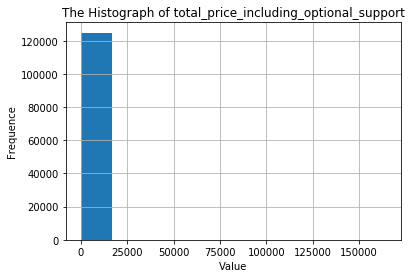

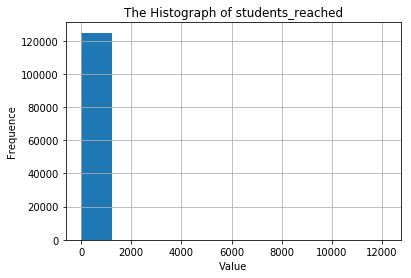

In [13]:
# generate histograph of continuous variables
pl.generate_graph(df, continuous_vars)

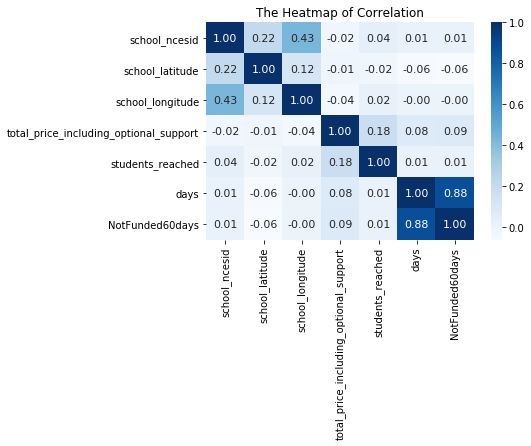

In [14]:
# generate heatmap of correlations between variables
pl.generate_corr_graph(df)

In [15]:
# find outliers
pl.count_outliers(df, continuous_vars)

,total_price_including_optional_support,students_reached
0,718,3790


# Step 3: Imputation/Pre-Process
In this step, I replaced the missing values with median.

In addition, I noremalized the continuous variables by scaling each continuous feature.


In [16]:
for cat in categorical_vars:
    pl.fill_missing(df, cat, 'categorical', 'Unknonw')
for ct in continuous_vars:
    pl.fill_missing(df, ct, 'continuous')

In [17]:
pl.normalize_features(df, continuous_vars)

# Step 4: Implement Kmeans
In this step, I implement Kmeans with different clusters.

Note that k-means algorithm isn't applicable for categorical data, so I only use continuous data to do the clustering.

In [18]:
df = df.reset_index()

In [33]:
clusters = [2, 3, 4]

Number of clusters is 2


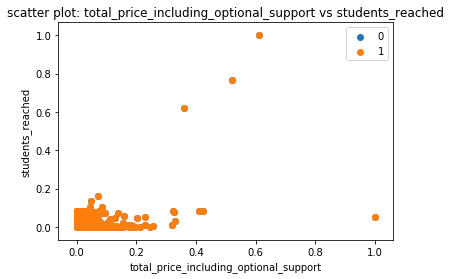

Number of clusters is 3


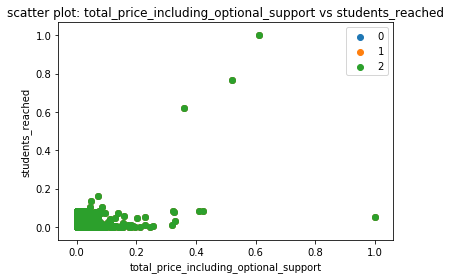

Number of clusters is 4


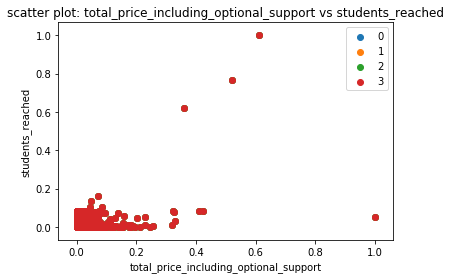

In [49]:
# run k-means
clustered_dfs = []
for c in clusters:
    print('Number of clusters is {}'.format(c))
    ndf = pl.run_kmeans(df, continuous_vars, c)
    clustered_df = ndf.copy()
    pl.generate_scatter_graph(clustered_df, continuous_vars, 'clusters')
    clustered_dfs.append(clustered_df)

# Step 5: Summary Stats
In this step, I will do the summary stats with different cluster.

Since the clustering is implemented based on continuous variables, I will only analyze the distinct continuous features of each cluster.

In [51]:
df_cluster_2 = clustered_dfs[0]
df_cluster_3 = clustered_dfs[1]
df_cluster_4 = clustered_dfs[2]

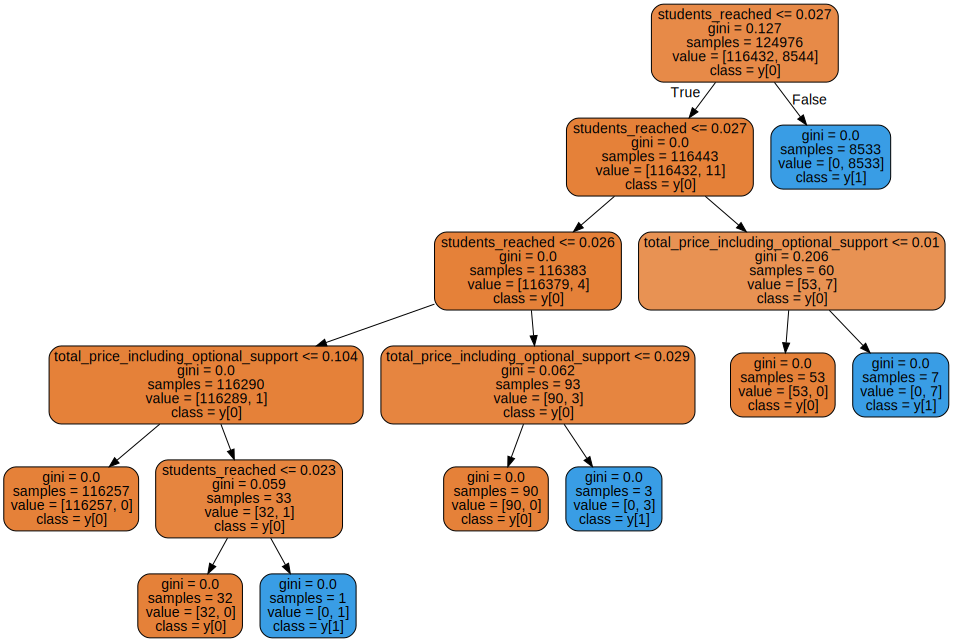

In [24]:
# when cluster is 2
pl.plot_decision_tree(df_cluster_2, continuous_vars, 'clusters', 2)

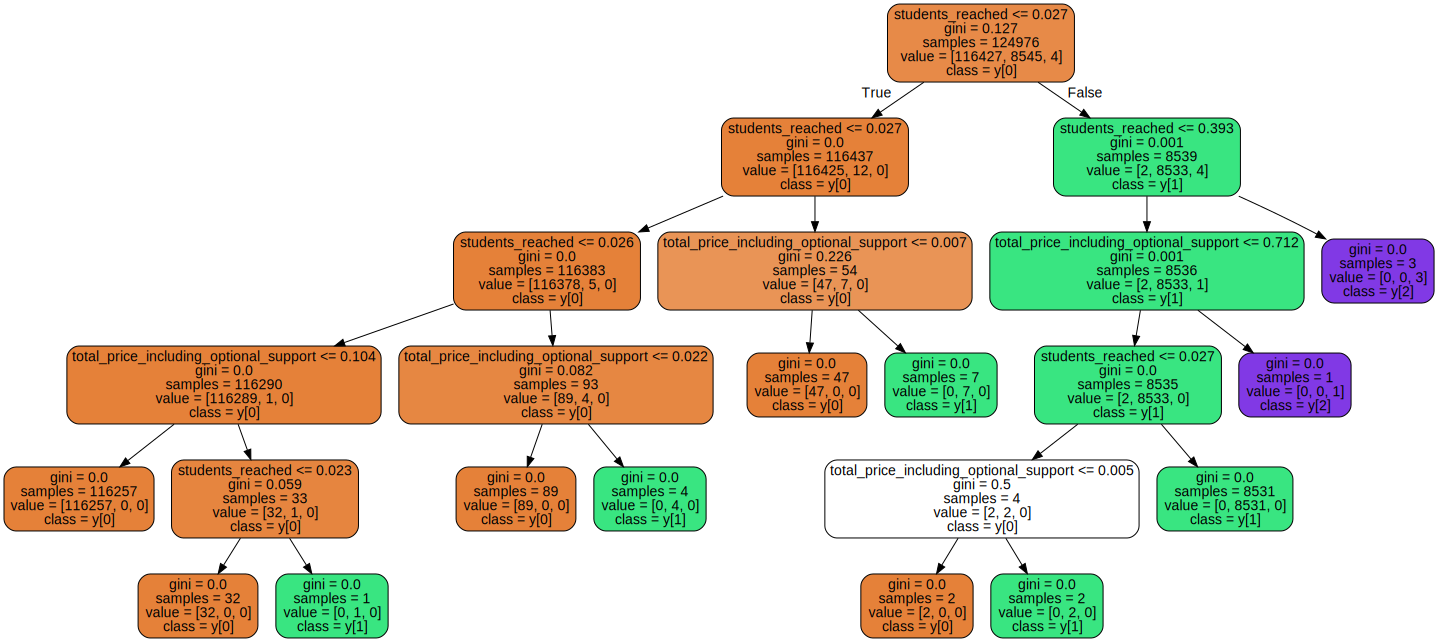

In [25]:
# when cluster is 3
pl.plot_decision_tree(df_cluster_3, continuous_vars, 'clusters', 3)

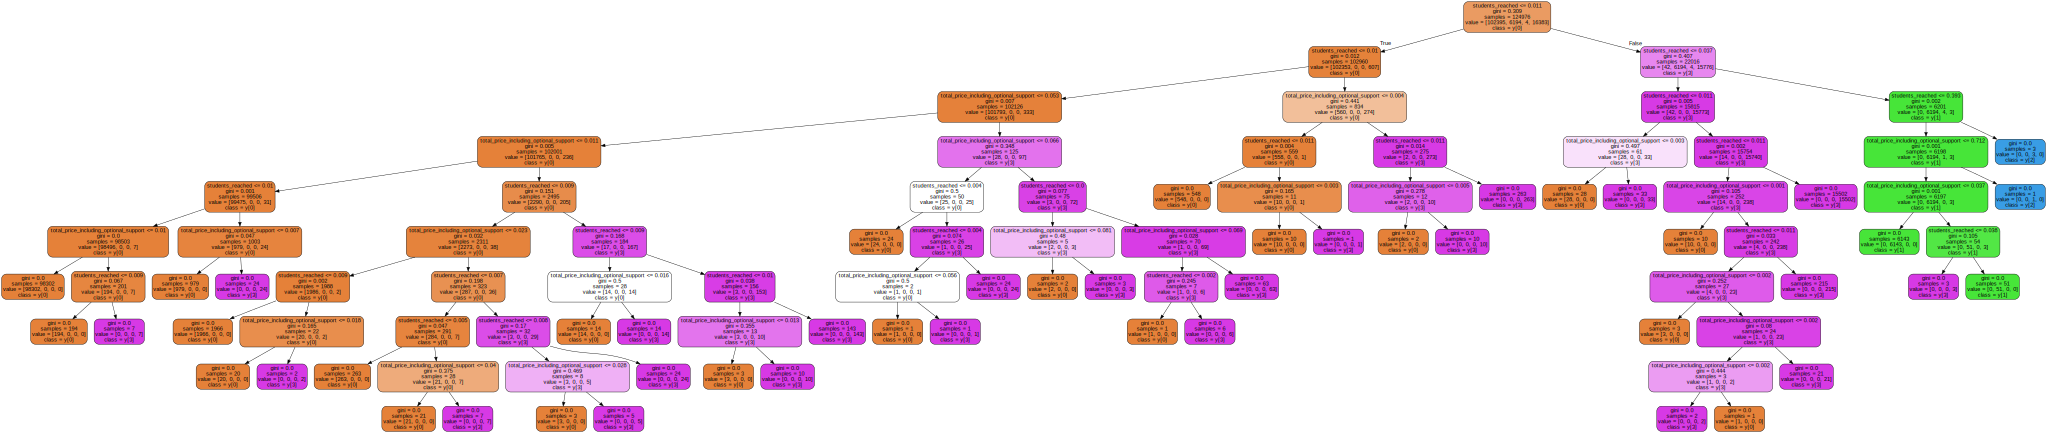

In [26]:
# when cluster is 4
pl.plot_decision_tree(df_cluster_4, continuous_vars, 'clusters', 4)

# Step 6: Functions for Users
In this step, there are three functions that allow users to do the following operations:

- merge several clusters into one
- recluster with a new k
- split a specific cluster into many (with a specific number of new clustering)

In [ ]:
# merge several clusters into one
# use df_cluster_4 and merge cluster 2 and 3 into one cluster labeled as 5

In [52]:
# before merging
df_cluster_4['clusters'].unique()

array([1, 2, 0, 3])

In [53]:
# after merging
new_df_cluster_4 = pl.merge_clusters(df_cluster_4, 5, [2, 3])
new_df_cluster_4['clusters'].unique()

array([1, 5, 0])

In [54]:
# recluster with a new k
# use df_cluster_2 and k = 5
k = 5

In [55]:
# before reclustering
df_cluster_2['clusters'].unique()

array([1, 0])

In [57]:
# after reclustering
new_df_cluster_2 = pl.run_kmeans(df_cluster_2, continuous_vars, 5)
new_df_cluster_2['clusters'].unique()

array([2, 4, 1, 0, 3])

In [59]:
# split a specific cluster into many (with a specific number of new clustering)
# use df_cluster_3 and split cluster labeled 0 into many

In [63]:
# before splitting
df_cluster_3['clusters'].unique()

array([0, 1, 2])

In [60]:
new_df_cluster_3 = pl.split_cluster(df_cluster_3, continuous_vars, 0, 5)

In [62]:
# after splitting
new_df_cluster_3['clusters'].unique()

array([1, 4, 0, 3, 2])